In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [64]:
print(sns.__version__)

0.12.2


In [65]:
df = pd.read_csv('./dataset/playerdata.csv')
df.head(5)

,DateTime,Players,Average Players
0,2011-11-30 00:00:00,680.0,NaN
1,2011-12-01 00:00:00,NaN,NaN
2,2011-12-02 00:00:00,NaN,NaN
3,2011-12-03 00:00:00,NaN,NaN
4,2011-12-04 00:00:00,NaN,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DateTime         4293 non-null   object 
 1   Players          4130 non-null   float64
 2   Average Players  343 non-null    float64
dtypes: float64(2), object(1)
memory usage: 100.7+ KB


In [67]:
df.shape

(4293, 3)

In [68]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [69]:
df['DateTime'] = df['DateTime'].dt.date


In [70]:
print(df.dtypes)

DateTime            object
Players            float64
Average Players    float64
dtype: object


In [71]:
csdf = df.fillna(0)
csdf.head(10)

,DateTime,Players,Average Players
0,2011-11-30,680.0,0.0
1,2011-12-01,0.0,0.0
2,2011-12-02,0.0,0.0
3,2011-12-03,0.0,0.0
4,2011-12-04,0.0,0.0
5,2011-12-05,0.0,0.0
6,2011-12-06,0.0,0.0
7,2011-12-07,0.0,0.0
8,2011-12-08,0.0,0.0
9,2011-12-09,0.0,0.0


In [72]:
print(csdf.head())

     DateTime  Players  Average Players
0  2011-11-30    680.0              0.0
1  2011-12-01      0.0              0.0
2  2011-12-02      0.0              0.0
3  2011-12-03      0.0              0.0
4  2011-12-04      0.0              0.0


In [73]:
csdf.isnull().sum()

DateTime           0
Players            0
Average Players    0
dtype: int64

In [74]:
csdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DateTime         4293 non-null   object 
 1   Players          4293 non-null   float64
 2   Average Players  4293 non-null   float64
dtypes: float64(2), object(1)
memory usage: 100.7+ KB


<Axes: >

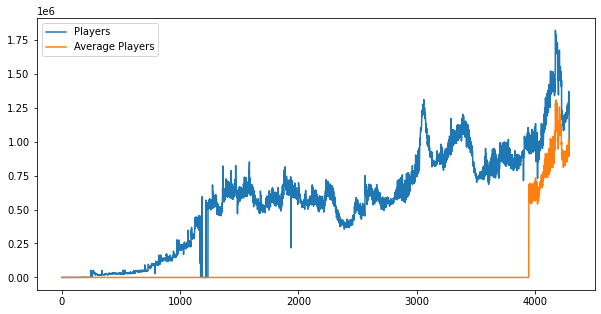

In [75]:
csdf.plot(figsize=(10,5))

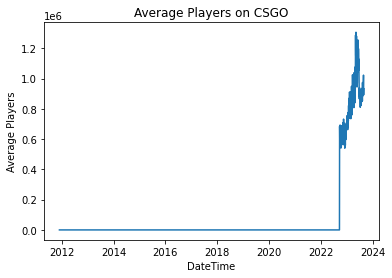

In [76]:
sns.lineplot(data=csdf, x="DateTime", y="Average Players")
plt.title("Average Players on CSGO")
plt.show()

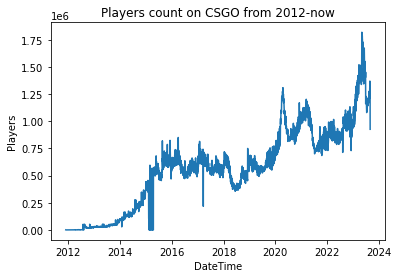

In [77]:
sns.lineplot(data=csdf, x="DateTime", y="Players")
plt.title("Players count on CSGO from 2012-now")
plt.show()

In [78]:
#stationary 
def ad_test(csdf):
    csdftest = adfuller(csdf, autolag='AIC')
    print("1. ADF : ", csdftest[0])
    print("2. P-Value : ", csdftest[1])
    print("3. lags : ", csdftest[2])
    print("4. num of observations : ", csdftest[3])
    print("5. critical values : ")
    for key , val in csdftest[4].items():
        print("\t", key, ": ",val)

In [79]:
ad_test(csdf['Players'])

1. ADF :  -1.6320238043353077
2. P-Value :  0.4664315515738108
3. lags :  31
4. num of observations :  4261
5. critical values : 
	 1% :  -3.4318856122567074
	 5% :  -2.8622185486666925
	 10% :  -2.567131196722582


In [80]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [81]:
check_arima = auto_arima(csdf['Players'], trace=True, suppress_warnings=True)
check_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=103028.625, Time=2.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=104062.194, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=104032.815, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=104011.031, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=104060.294, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=103475.065, Time=0.78 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=103387.091, Time=0.79 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=102772.253, Time=2.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=103272.049, Time=0.86 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=102557.557, Time=3.71 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=103114.370, Time=0.82 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=102523.403, Time=4.95 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=102941.486, Time=1.04 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=102511.464, Time=5.44 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4293
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -51102.163
Date:                Fri, 01 Sep 2023   AIC                         102228.327
Time:                        11:34:48   BIC                         102304.701
Sample:                             0   HQIC                        102255.303
                               - 4293                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    499.1954    431.958      1.156      0.248    -347.427    1345.818
ar.L1          1.0201      0.027     37.754      0.000       0.967       1.073
ar.L2         -1.6038      0.022    -71.488      0.000      -1.648      -1.560
ar.L3          1.1100      0.038     29.488      0.000       1.036       1.184
ar.L4         -1.1470      0.021    -54.799      0.000      -1.188      -1.106
ar.L5          0.2187      0.025      8.898      0.000       0.171       0.267
ma.L1         -1.3650      0.026    -51.633      0.000      -1.417      -1.313
ma.L2          1.7738      0.028     62.991      0.000       1.719       1.829
ma.L3         -1.5426      0.035    -44.557      0.000      -1.610      -1.475
ma.L4          1.2743      0.024     52.746      0.000       1.227       1.322
ma.L5         -0.5001      0.018    -27.238      0.000      -0.536      -0.464
sigma2       1.47e+09      0.004   3.51e+11      0.000    1.47e+09    1.47e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):            746879.00
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             1.50
Prob(H) (two-sided):                  0.12   Kurtosis:                        67.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.92e+25. Standard errors may be unstable.
"""

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
# X = csdf['DateTime']
# y = csdf['Players']

In [84]:
# X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# print(train.shape, test.shape)

In [85]:
print(csdf.shape)
train = csdf.iloc[:-20]
test = csdf.iloc[-20:]
print(train.shape, test.shape)

(4293, 3)
(4273, 3) (20, 3)


In [92]:
model= ARIMA(train['Players'], order=(5,1,5))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Players   No. Observations:                 4273
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -50798.631
Date:                Fri, 01 Sep 2023   AIC                         101619.262
Time:                        11:38:14   BIC                         101689.220
Sample:                             0   HQIC                        101643.977
                               - 4273                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9759      0.026     38.153      0.000       0.926       1.026
ar.L2         -1.5646      0.022    -70.906      0.000      -1.608      -1.521
ar.L3          1.0397      0.036     28.820      0.000       0.969       1.110
ar.L4         -1.1104      0.020    -54.868      0.000      -1.150      -1.071
ar.L5          0.1760      0.023      7.549      0.000       0.130       0.222
ma.L1         -1.3157      0.025    -52.188      0.000      -1.365      -1.266
ma.L2          1.7279      0.028     62.273      0.000       1.674       1.782
ma.L3         -1.4775      0.034    -43.044      0.000      -1.545      -1.410
ma.L4          1.2432      0.024     52.011      0.000       1.196       1.290
ma.L5         -0.4760      0.018    -26.084      0.000      -0.512      -0.440
sigma2      1.429e+09    6.4e-11   2.23e+19      0.000    1.43e+09    1.43e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):            771944.36
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             1.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        68.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.16e+34. Standard errors may be unstable.
"""

In [98]:
start = len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start, end=end,typ="levels")
print(pred)
pred.index=csdf.index[start:end+1]
print(pred)

TypeError: predict() missing 1 required positional argument: 'params'